#### Set Memory Limit

This problem is because when keras run with gpu, it uses almost all vram. So we needed to give memory_limit for each notebook as shown below

In [2]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])
  except RuntimeError as e:
    print(e);

### An end-to-end example: A linear classifier in pure TensorFlow (*from chapter 3.5.4*)
A linear classifier is an affine transformation (prediction = W • input + b) trained to minimize the square of the difference between predictions and the targets.

#### Steps
1. **Create synthetic data**
    1. Generate two classes of random points in 2D plane (1000,2) -- 1000 points with 2D(x,y) coordinates
    1. Stack the two classes into an array of the shape (2000,2)
    1. Generate the corresponding target labels (0 and 1)
    1. Plotting the two point classes
    <br/>
    <br/>
1. **Create linear classifier**
    1. Create linear classifier variables W and b -- weights
    1. Create forward pass function -- predictions
    1. Create mean square error loss function -- loss
    1. The training step function -- gradient, update weights, print loss
    1. The batch training loop -- training step on batches of data
    1. Plot linear function(line separating data)



#### 1. **Create synthetic data**

##### Generate two classes of random points in 2D

In [3]:
import numpy as np

# number of points per pointcloud
num_samples_per_class = 1000 

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [4]:
print(f'shape:{negative_samples.shape}, 0-th point:{negative_samples[0]}')
print(f'shape:{positive_samples.shape}, 0-th point:{positive_samples[0]}')

shape:(1000, 2), 0-th point:[-1.90129893  3.341902  ]
shape:(1000, 2), 0-th point:[3.05481818 0.42746094]


##### Stack two classes into an array of the shape (2000,2)

In [5]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [ ]:
print(f'shape:{inputs.shape}, 0-th point:{inputs[0]}')
print(f'shape:{inputs.shape}, 1000-th point:{inputs[1000]}')


##### Generate the corresponding target labels (0 and 1)

In [6]:
targets = np.vstack((np.zeros(shape=(num_samples_per_class, 1), dtype="float32"), 
                    np.ones(shape=(num_samples_per_class, 1), dtype="float32")))

In [7]:
print(f'shape:{targets.shape}, 0-th point:{targets[0]}')
print(f'shape:{targets.shape}, 1000-th point:{targets[1000]}')


shape:(2000, 1), 0-th point:[0.]
shape:(2000, 1), 1000-th point:[1.]


##### Plotting the two point classes


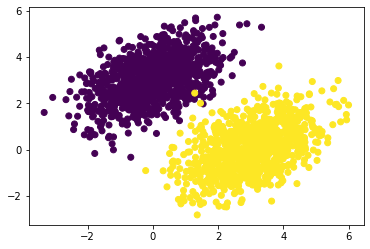

In [8]:
import matplotlib.pyplot as plt 
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

#### 2. **Create linear classifier**

##### Create linear classifier variables W and b

In [10]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=output_dim,))

In [11]:
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.58144724],
       [0.02084696]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


##### Create forward pass function

Because our linear classifier operates on 2D inputs, W is just two scalar coefficients W = [[W1, W2]] and b is a single scalar coefficient.
It's prediction value is <br/> 
`prediction = [x,y] • [[W1, W2]] + b = x*W1 + y*W2 + b` <br/>


In [12]:
def model(inputs):
    return tf.matmul(inputs, W) + b

##### Create mean square error loss function


In [13]:
def mean_square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [14]:
predictions = model(inputs)
loss = targets - predictions
print(f'inputs.shape:{inputs.shape}, inputs[:5]: \n{inputs[:5]}')
print(f'predictions.shape:{predictions.shape}, predictions[:5]: \n{predictions[:5]}')
print(f'targets.shape:{targets.shape}, targets[:5]: \n{targets[:5]}')
print(f'loss.shape:{loss.shape}, loss[:5]: \n{loss[:5]}')

inputs.shape:(2000, 2), inputs[:5]: 
[[-1.9012989  3.341902 ]
 [ 1.219967   4.1531587]
 [ 1.1862342  3.331824 ]
 [-2.662927   2.158619 ]
 [-1.2109474  2.1664252]]
predictions.shape:(2000, 1), predictions[:5]: 
[[-1.0358365 ]
 [ 0.7959272 ]
 [ 0.75919104]
 [-1.5033509 ]
 [-0.65893865]]
targets.shape:(2000, 1), targets[:5]: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
loss.shape:(2000, 1), loss[:5]: 
[[ 1.0358365 ]
 [-0.7959272 ]
 [-0.75919104]
 [ 1.5033509 ]
 [ 0.65893865]]


##### Create training step function

In [15]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = mean_square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

##### The batch training loop

In [16]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:.4f}')

Loss at step 0: 0.6323
Loss at step 1: 0.1455
Loss at step 2: 0.1010
Loss at step 3: 0.0904
Loss at step 4: 0.0845
Loss at step 5: 0.0796
Loss at step 6: 0.0751
Loss at step 7: 0.0710
Loss at step 8: 0.0672
Loss at step 9: 0.0638
Loss at step 10: 0.0606
Loss at step 11: 0.0577
Loss at step 12: 0.0550
Loss at step 13: 0.0526
Loss at step 14: 0.0504
Loss at step 15: 0.0483
Loss at step 16: 0.0464
Loss at step 17: 0.0447
Loss at step 18: 0.0431
Loss at step 19: 0.0416
Loss at step 20: 0.0403
Loss at step 21: 0.0391
Loss at step 22: 0.0380
Loss at step 23: 0.0369
Loss at step 24: 0.0360
Loss at step 25: 0.0351
Loss at step 26: 0.0343
Loss at step 27: 0.0336
Loss at step 28: 0.0329
Loss at step 29: 0.0323
Loss at step 30: 0.0318
Loss at step 31: 0.0312
Loss at step 32: 0.0308
Loss at step 33: 0.0303
Loss at step 34: 0.0299
Loss at step 35: 0.0296
Loss at step 36: 0.0292
Loss at step 37: 0.0289
Loss at step 38: 0.0286
Loss at step 39: 0.0284


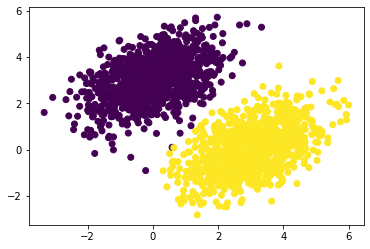

In [18]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

##### Plot linear function separating data

We can conwert function `x*W1 + y*W2 + b = 0.5` to line equation `y = - W1/W2 *x + (0.5 - b)/w2` 

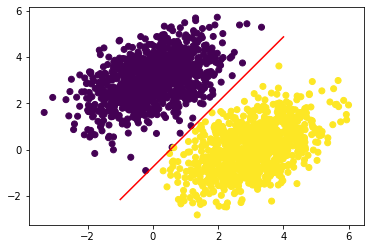

In [19]:
# generates 100 reguraly spaced numbers between -1 and 4 
x = np.linspace(-1, 4, 100) 

# line equation if form of y = ax + b, converted from (w1*x + w2*y + b = 0.5)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1] 

plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)